<h2>Market Basket Analysis</h2>

Market Basket Analysis is a data-driven technique used to uncover patterns and relationships within large transactional datasets, particularly in retail and e-commerce. It helps businesses understand which products or items are often purchased together, providing insights for optimizing product placement, marketing strategies, and promotions.

Market Basket Analysis is a valuable tool for businesses seeking to optimize their product offerings, increase cross-selling opportunities, and improve marketing strategies. It can lead to higher revenue, enhanced customer satisfaction, and overall business success.

In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# read the dataset
data = pd.read_csv("market_basket_dataset.csv")

In [3]:
# check the shape of data
data.shape

(500, 5)

In [4]:
# let's look at the first five records
data.head()

,BillNo,Itemname,Quantity,Price,CustomerID
0,1000,Apples,5,8.30,52299
1,1000,Butter,4,6.06,11752
2,1000,Eggs,4,2.66,16415
3,1000,Potatoes,4,8.10,22889
4,1004,Oranges,2,7.26,52255


In [6]:
# datatypes present
data.dtypes

BillNo          int64
Itemname       object
Quantity        int64
Price         float64
CustomerID      int64
dtype: object

In [7]:
# descriptive statistics
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
BillNo,500.0,NaN,NaN,NaN,1247.442,144.483097,1000.0,1120.0,1246.5,1370.0,1497.0
Itemname,500,19,Bananas,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,500.0,NaN,NaN,NaN,2.978,1.426038,1.0,2.0,3.0,4.0,5.0
Price,500.0,NaN,NaN,NaN,5.61766,2.572919,1.04,3.57,5.43,7.92,9.94
CustomerID,500.0,NaN,NaN,NaN,54229.8,25672.122585,10504.0,32823.5,53506.5,76644.25,99162.0


In [8]:
# concise information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BillNo      500 non-null    int64  
 1   Itemname    500 non-null    object 
 2   Quantity    500 non-null    int64  
 3   Price       500 non-null    float64
 4   CustomerID  500 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 19.7+ KB


In [9]:
# check for duplicate records
data.duplicated().sum()

0

In [10]:
# check for null/missing values
data.isnull().sum()

BillNo        0
Itemname      0
Quantity      0
Price         0
CustomerID    0
dtype: int64

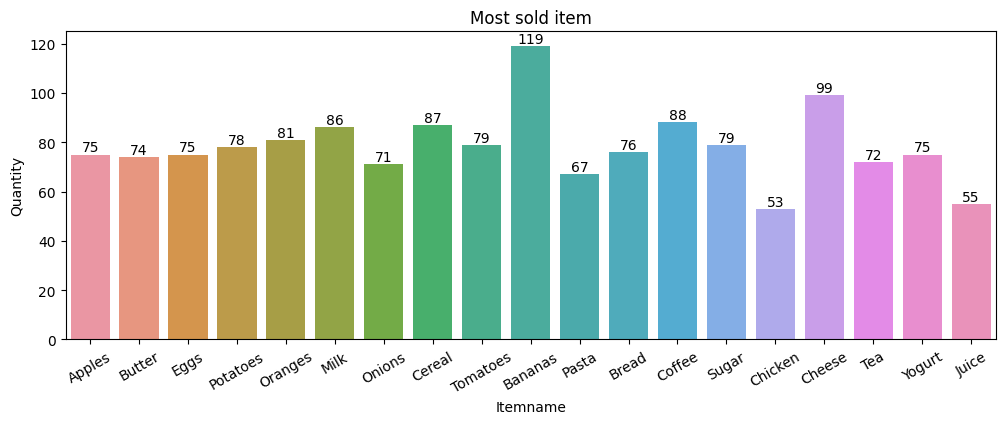

In [29]:
# most sold item
plt.figure(figsize=(12,4))
ax = plt.subplot2grid((1,1),(0,0))

sns.barplot(x='Itemname', y='Quantity', data=data, ci=None, estimator=np.sum, ax=ax)
for i in ax.containers:
    plt.bar_label(i)
plt.title("Most sold item")
plt.xticks(rotation=30)
plt.show()

from above barplot we can say that:
 - Bananas (119 units) are sold most followed by Cheese (99 units) and Coffee (88 units).
 - Chicken (53 units) is sold least followed by Juice (55 units) and Pasta (67 units).

In [38]:
# average quantity and total purchase by Customer
data.groupby('CustomerID').agg({'Quantity': 'mean', 'Price':'sum'}).sort_values(by='Price', ascending=False).head(10).reset_index()

,CustomerID,Quantity,Price
0,46419,3.5,11.49
1,78411,4.0,9.94
2,33260,2.0,9.94
3,16469,5.0,9.93
4,42722,4.0,9.88
5,76583,1.0,9.87
6,83029,1.0,9.86
7,42445,3.0,9.84
8,18108,4.0,9.84
9,65941,5.0,9.83


Here, we are exploring customer behaviour, comparing average quantity and total spending, and analyzing exact numerical values in the table for top 10 customer.

Now, let’s use the Apriori algorithm to create association rules. The Apriori algorithm is used to discover frequent item sets in large transactional datasets. It aims to identify items that are frequently purchased together in transactional data. It helps uncover patterns in customer behaviour, allowing businesses to make informed decisions about product placement, promotions, and marketing.

In [50]:
from mlxtend.frequent_patterns import apriori, association_rules

# Group items by BillNo and create a list of items for each bill
basket = data.groupby('BillNo')['Itemname'].apply(list).reset_index()

# Encode items as binary variables using one-hot encoding
basket_encoded = basket['Itemname'].str.join('|').str.get_dummies('|')

# Find frequent itemsets using Apriori algorithm with lower support
frequent_itemsets = apriori(basket_encoded, min_support=0.01, use_colnames=True)

# Generate association rules with lower lift threshold
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=0.5)

# Display association rules
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

d:\anaconda\envs\Deep_Learning\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,support,confidence,lift
0,(Bread),(Apples),0.045752,0.304348,1.862609
1,(Apples),(Bread),0.045752,0.280000,1.862609
2,(Butter),(Apples),0.026144,0.160000,0.979200
3,(Apples),(Butter),0.026144,0.160000,0.979200
4,(Cereal),(Apples),0.019608,0.096774,0.592258
...,...,...,...,...,...
18487,(Coffee),"(Cereal, Butter, Bread, Oranges, Chicken, Juice)",0.013072,0.060606,4.636364
18488,(Butter),"(Cereal, Coffee, Bread, Oranges, Chicken, Juice)",0.013072,0.080000,6.120000
18489,(Oranges),"(Cereal, Coffee, Butter, Bread, Chicken, Juice)",0.013072,0.068966,5.275862
18490,(Chicken),"(Cereal, Coffee, Butter, Bread, Oranges, Juice)",0.013072,0.100000,7.650000


The above output shows association rules between different items (antecedents) and the items that tend to be purchased together with them (consequents). Let’s interpret the output step by step:

 - <b>Antecedents:</b> These are the items that are considered as the starting point or “if” part of the association rule. For example, Bread, Butter, Cereal, Cheese, and Chicken are the antecedents in this analysis.

 - <b>Consequents:</b> These are the items that tend to be purchased along with the antecedents or the “then” part of the association rule.

 - <b>Support:</b> Support measures how frequently a particular combination of items (both antecedents and consequents) appears in the dataset. It is essentially the proportion of transactions in which the items are bought together. For example, the first rule indicates that Bread and Apples are bought together in approximately 4.58% of all transactions.

 - <b>Confidence:</b> Confidence quantifies the likelihood of the consequent item being purchased when the antecedent item is already in the basket. In other words, it shows the probability of buying the consequent item when the antecedent item is bought. For example, the first rule tells us that there is a 30.43% chance of buying Apples when Bread is already in the basket.

 - <b>Lift:</b> Lift measures the degree of association between the antecedent and consequent items, while considering the baseline purchase probability of the consequent item. A lift value greater than 1 indicates a positive association, meaning that the items are more likely to be bought together than independently. A value less than 1 indicates a negative association. For example, the first rule has a lift of approximately 1.86, suggesting a positive association between Bread and Apples.

<h3>Summary:</h3>

Market Basket Analysis is a valuable tool for businesses seeking to optimize their product offerings, increase cross-selling opportunities, and improve marketing strategies. It can lead to higher revenue, enhanced customer satisfaction, and overall business success.